<a href="https://colab.research.google.com/github/Biyani404198/Eyes-and-Mouth-Detection-using-OpenCV/blob/main/eyes_and_mouth_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:
Take a few facial images as inputs (from FFHQ dataset)
The output has to be the coordinates of three bounding  boxes - two maximally enclosing the eyes and one enclosing the mouth
Your code should be in python. You can use PIL or openCV.

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
from google.colab.patches import cv2_imshow
import os
import collections

Since it was my initial attempt at Haarcascading, I decided to start by working with a single image to gain a better understanding of how it functions.

In [108]:
# Load the facial image
image_path = "/content/FFHQ/00013.png"  # Replace with the actual image path in the FFHQ dataset
image = cv2.imread(image_path)

In [109]:
# Load the pre-trained Haar cascades for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load the pre-trained Haar cascade for mouth detection
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [110]:
# Convert the image to grayscale for cascade detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [111]:
# Detect eyes in the image
eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Detect mouth in the image
mouths = mouth_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [112]:
# Draw a single bounding box around each eye
for (X, Y, width, height) in eyes:
    cv2.rectangle(image,  (X,Y), (X+width, Y+height), (0, 0, 255), 2)

# Draw a single bounding box around the mouth
for (X, Y, width, height) in mouths:
    cv2.rectangle(image,  (X,Y), (X+width, Y+height), (0, 0, 255), 2)

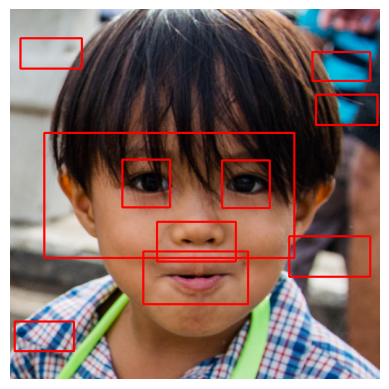

In [113]:
# Convert the image to RGB format for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

As seen above, the cascading made no sense as there are multiple boxes at inappropriate positions. So I read the documentation for cv.CascadeClassifier.detectMultiScale().

The parameters and their functions are:
- `image`	: Matrix of the type CV_8U containing an image where objects are detected.
- `objects` : Vector of rectangles where each rectangle contains the detected object, the rectangles may be partially outside the original image.
- `scaleFactor` :	Parameter specifying how much the image size is reduced at each image scale.
- `minNeighbors` : Parameter specifying how many neighbors each candidate rectangle should have to retain it.
- `flags` :	Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.
- `minSize` :	Minimum possible object size. Objects smaller than that are ignored.
- `maxSize` :	Maximum possible object size. Objects larger than that are ignored. If maxSize == minSize model is evaluated on single scale.


after getting an understanding of what each parameter does, I tried tuning them to see how it affects the cascading.

In [114]:
# Load the facial image
image_path = "/content/FFHQ/00013.png"  # Replace with the actual image path in the FFHQ dataset
image = cv2.imread(image_path)

In [115]:
# Convert the image to grayscale for cascade detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [116]:
# changing minNeighbors from 5 to 2 and setting a maxSize limit in eye_cascade
eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=2, minSize=(30, 30), maxSize=(70,70))

# changing minNeighbors from 5 to 2, setting a maxSize limit and changing minSize in eye_cascade
mouths = mouth_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=15, minSize=(70, 70), maxSize=(200,200))

In [117]:
# Draw a single bounding box around each eye
for (X, Y, width, height) in eyes:
    cv2.rectangle(image,  (X,Y), (X+width, Y+height), (0, 0, 255), 2)

# Draw a single bounding box around the mouth
for (X, Y, width, height) in mouths:
    cv2.rectangle(image,  (X,Y), (X+width, Y+height), (0, 0, 255), 2)

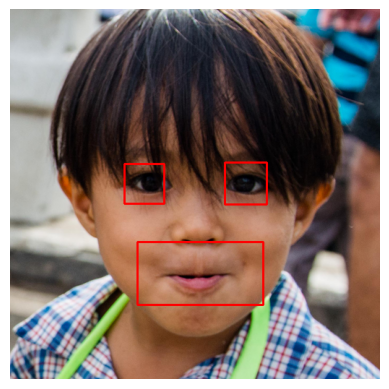

In [118]:
# Convert the image to RGB format for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

I tried different image to verify the parameters.

In [ ]:
# Load the facial image
image_path = "/content/FFHQ/00004.png"  # Replace with the actual image path in the FFHQ dataset
image = cv2.imread(image_path)

In [ ]:
# Convert the image to grayscale for cascade detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# changing minNeighbors from 5 to 2 and setting a maxSize limit in eye_cascade
eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=2, minSize=(30, 30), maxSize=(70,70))

# changing minNeighbors from 5 to 2, setting a maxSize limit and changing minSize in eye_cascade
mouths = mouth_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=15, minSize=(70, 70), maxSize=(200,200))

In [ ]:
# Draw a single bounding box around each eye
for (X, Y, width, height) in eyes:
    cv2.rectangle(image,  (X,Y), (X+width, Y+height), (0, 0, 255), 2)

# Draw a single bounding box around the mouth
for (X, Y, width, height) in mouths:
    cv2.rectangle(image,  (X,Y), (X+width, Y+height), (0, 0, 255), 2)

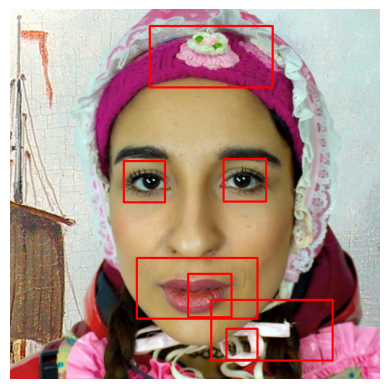

In [ ]:
# Convert the image to RGB format for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

The parameters set above didn't cascade other picture appropriately. So I tried changing it a bit.

In [ ]:
# Load the facial image
image_path = "/content/FFHQ/00004.png"  # Replace with the actual image path in the FFHQ dataset
image = cv2.imread(image_path)

In [ ]:
# Convert the image to grayscale for cascade detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# changing scaleFactor to 1.3
eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=2, minSize=(30, 30), maxSize=(70,70))

# changing scaleFactor to 2.0
mouths = mouth_cascade.detectMultiScale(gray_image, scaleFactor=2.0, minNeighbors=15, minSize=(70, 70), maxSize=(200,200))

In [ ]:
# Draw a single bounding box around each eye
for (X, Y, width, height) in eyes:
    cv2.rectangle(image,  (X,Y), (X+width, Y+height), (0, 0, 255), 2)

# Draw a single bounding box around the mouth
for (X, Y, width, height) in mouths:
    cv2.rectangle(image,  (X,Y), (X+width, Y+height), (0, 0, 255), 2)

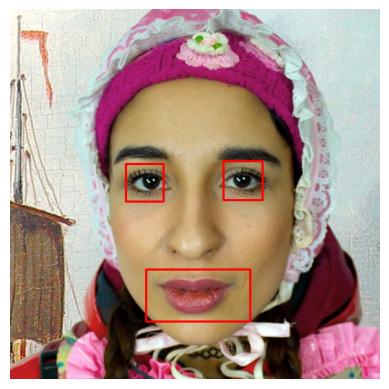

In [ ]:
# Convert the image to RGB format for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

The cascading is appropriate now. But, it's inappropriate to change parameter settings for each image manually. So I created a helper function to pick the maximum occuring value from the different value of scaleFactor.

In [119]:
# Load the pre-trained Haar cascades for eyes detection and mouth Detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [120]:
# Function to detect eye boundary boxes coordinates

def detect_eyes(folder_path):
    # Dictionary to store the bounding box coordinates of eyes for each filename
    eyes_coordinates = {}

    # Iterate over the images in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)

            # Convert the image to grayscale for cascade detection
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # looping over the range 1.0 to 1.9
            eyes_list = []
            eyes_values = {}
            for i in [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]:
                # Detect eyes in the image
                eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=i, minNeighbors=2, minSize=(30, 30), maxSize=(70, 70))

                eyes_list.append(len(eyes))
                eyes_values.update({len(eyes): eyes})
            print('eyes_list for', filename, '\n', eyes_list)

            # Helper function to pick the max occurring value from the eyes_list
            evalue = 0
            for key, value in collections.Counter(eyes_list).items():
                if value == max(collections.Counter(eyes_list).values()):
                    evalue = key
                    print("scaleFactor:", evalue)
                    break

            # Extract the bounding box coordinates of eyes
            eyes_coordinates[filename] = eyes_values[evalue].tolist()

    return eyes_coordinates

# Provide the folder path containing the images
folder_path = "/content/FFHQ"

# Call the function to detect eyes and get the bounding box coordinates
eyes_coordinates = detect_eyes(folder_path)

# Print the dictionary with filename as key and bounding box coordinates as value
print('-'*70)
print("boundary box coordinates for eyes:")
for filename, coordinates in eyes_coordinates.items():
    print(filename, ":", coordinates)


eyes_list for 00008.png 
 [3, 3, 3, 2, 3, 2, 2, 3, 0, 1]
scaleFactor: 3
eyes_list for 00007.png 
 [2, 2, 3, 2, 2, 2, 2, 2, 0, 1]
scaleFactor: 2
eyes_list for 00004.png 
 [4, 2, 2, 2, 2, 2, 2, 2, 0, 3]
scaleFactor: 2
eyes_list for 00006.png 
 [2, 2, 2, 2, 2, 2, 3, 2, 2, 2]
scaleFactor: 2
eyes_list for 00012.png 
 [3, 3, 2, 3, 2, 2, 2, 2, 0, 4]
scaleFactor: 2
eyes_list for 00002.png 
 [3, 3, 4, 2, 2, 2, 3, 2, 0, 2]
scaleFactor: 2
eyes_list for 00013.png 
 [2, 2, 2, 2, 3, 2, 2, 2, 0, 0]
scaleFactor: 2
----------------------------------------------------------------------
boundary box coordinates for eyes:
00008.png : [[156, 209, 65, 65], [288, 213, 65, 65], [427, 275, 65, 65]]
00007.png : [[295, 208, 65, 65], [161, 217, 65, 65]]
00004.png : [[155, 206, 65, 65], [289, 204, 65, 65]]
00006.png : [[172, 219, 40, 40], [312, 226, 40, 40]]
00012.png : [[158, 207, 65, 65], [282, 208, 65, 65]]
00002.png : [[302, 224, 40, 40], [163, 223, 40, 40]]
00013.png : [[158, 209, 65, 65], [295, 207, 65, 65]]

In [ ]:
# Function to detect mouth boundary boxes coordinates

def detect_mouth(folder_path):
    # Dictionary to store the bounding box coordinates of eyes for each filename
    mouth_coordinates = {}

    # Iterate over the images in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)

            # Convert the image to grayscale for cascade detection
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # looping over the range 1.0 to 1.9
            mouth_list = []
            mouth_values = {}
            for i in [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]:
                # Detect eyes in the image
                mouth = mouth_cascade.detectMultiScale(gray_image, scaleFactor=i, minNeighbors=15, minSize=(70, 70), maxSize=(200,200))

                mouth_list.append(len(mouth))
                mouth_values.update({len(mouth): mouth})
            print('mouth_list for', filename, '\n', mouth_list)

            # Helper function to pick the max occurring value from the eyes_list
            mvalue = 0
            for key, value in collections.Counter(mouth_list).items():
                if value == max(collections.Counter(mouth_list).values()):
                    mvalue = key
                    print("scaleFactor:", mvalue)
                    break

            # Extract the bounding box coordinates of eyes
            mouth_coordinates[filename] = mouth_values[mvalue].tolist()

    return mouth_coordinates

# Provide the folder path containing the images
folder_path = "/content/FFHQ"

# Call the function to detect eyes and get the bounding box coordinates
mouth_coordinates = detect_mouth(folder_path)

# Print the dictionary with filename as key and bounding box coordinates as value
print('-'*70)
print("boundary box coordinates for mouth:")
for filename, coordinates in mouth_coordinates.items():
    print(filename, ":", coordinates)


mouth_list for 00008.png 
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
scaleFactor: 1
mouth_list for 00007.png 
 [2, 2, 1, 1, 1, 1, 1, 0, 0, 2]
scaleFactor: 1
mouth_list for 00004.png 
 [3, 3, 1, 1, 1, 2, 2, 0, 0, 1]
scaleFactor: 1
mouth_list for 00006.png 
 [2, 1, 1, 1, 1, 1, 1, 0, 0, 1]
scaleFactor: 1
mouth_list for 00012.png 
 [2, 2, 1, 1, 1, 1, 1, 0, 0, 2]
scaleFactor: 1
mouth_list for 00002.png 
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
scaleFactor: 1
mouth_list for 00013.png 
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
scaleFactor: 1
----------------------------------------------------------------------
boundary box coordinates for mouth:
00008.png : [[186, 349, 144, 72]]
00007.png : [[160, 306, 177, 88]]
00004.png : [[188, 360, 144, 72]]
00006.png : [[192, 343, 144, 72]]
00012.png : [[172, 340, 177, 88]]
00002.png : [[181, 324, 144, 72]]
00013.png : [[184, 330, 144, 72]]


In [ ]:
# function to display image along with boundary boxes

def display_image_with_boxes(image, eye_boxes, mouth_boxes):
    # Draw eye bounding boxes
    for (x, y, w, h) in eye_boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Draw mouth bounding boxes
    for (x, y, w, h) in mouth_boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    cv2_imshow(image)

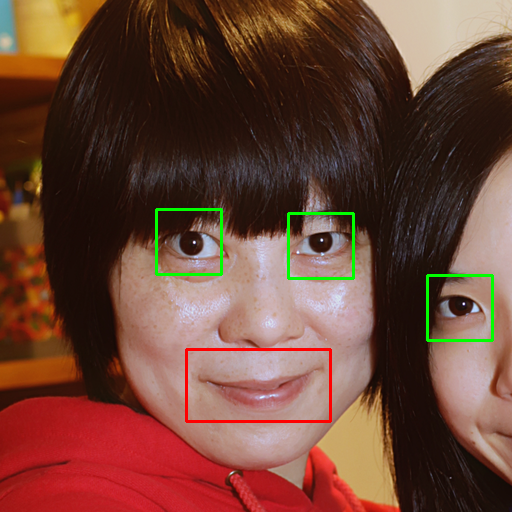

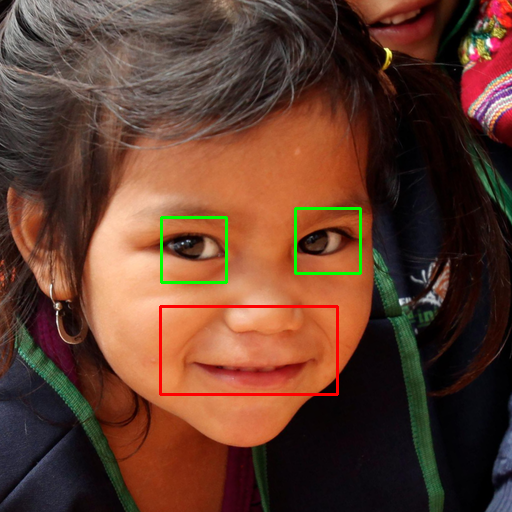

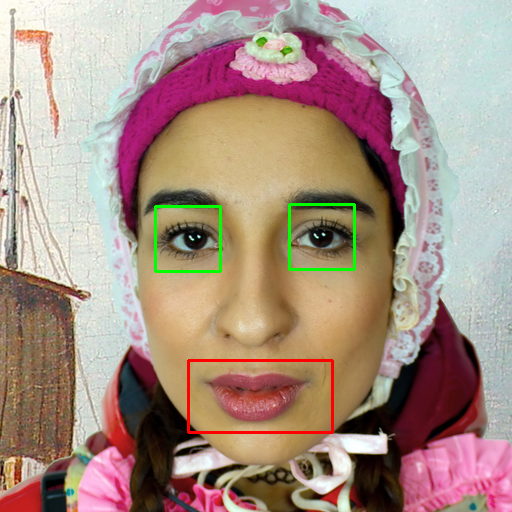

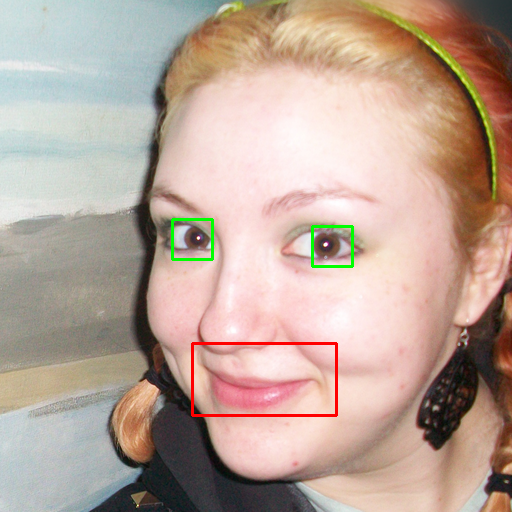

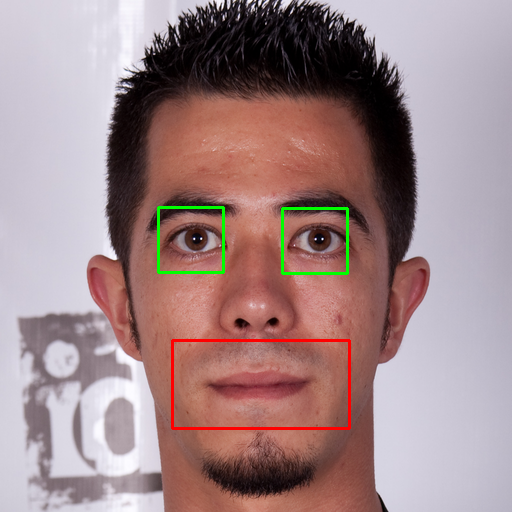

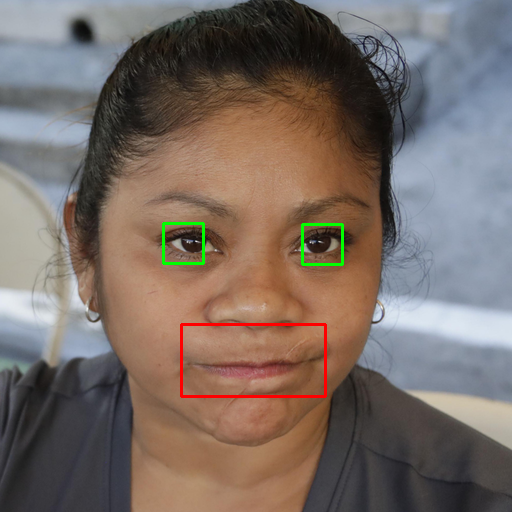

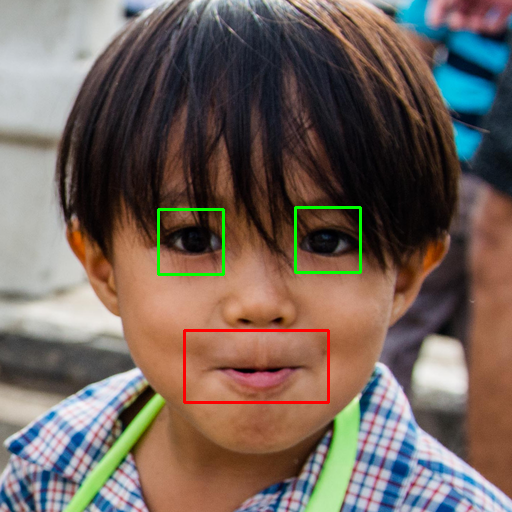

In [ ]:
for filename, mouth_boxes in mouth_coordinates.items():
    if filename in eyes_coordinates:
        eye_boxes = eyes_coordinates[filename]
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        display_image_with_boxes(image, eye_boxes, mouth_boxes)